## COMTRADE DATA ANALYSIS

**Note**: Here, I will add geographical data to the csv files, and I will also analyze the data to look at the supply chains and extract basic facts out of the data.

Look at the data for forests and supply chains; there should be papers referencing it from 2007 and 2010. 
Make Sankey diagrams to look at in-flows and outflows of bamboo.

Look at the top 10 countries that import and export and map out the forests and densities.
Then start with market analysis.

#### Importing Tools

In [2]:
%load_ext lab_black

In [3]:
import pandas as pd
import geopandas as gpd

In [4]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

#### Importing Data

In [5]:
comtrade_1 = pd.read_csv("../data/raw/2016-2012_bamboo_trade_data.csv")

In [6]:
comtrade_1.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2013,2013,2013,6,1,1,Import,8,Albania,ALB,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,26.0,NaN,NaN,NaN,10720.0,NaN,15708,NaN,NaN,2
1,H4,2012,2012,2012,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",1,No Quantity,NaN,NaN,NaN,NaN,924323.0,NaN,872057,NaN,NaN,0
2,H4,2013,2013,2013,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,1382.0,NaN,NaN,NaN,779783.0,NaN,840063,NaN,NaN,2
3,H4,2014,2014,2014,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,1076.0,NaN,NaN,NaN,502094.0,NaN,751967,NaN,NaN,2
4,H4,2015,2015,2015,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,11672.0,NaN,NaN,NaN,317970.0,NaN,303758,NaN,NaN,0


In [7]:
comtrade_1["Reporter"] = comtrade_1["Reporter"].str.replace(
    "Bolivia (Plurinational State of)", "Bolivia", regex=True
)

In [8]:
comtrade_2 = pd.read_csv("../data/raw/2021-2017_bamboo_trade_data.csv")

In [9]:
comtrade_2.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H5,2017,2017,2017,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,61,NaN,NaN,NaN,39852.0,NaN,33455,NaN,NaN,2
1,H5,2017,2017,2017,6,1,1,Import,36,Australia,AUS,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,4897,NaN,NaN,NaN,1307168.0,NaN,2090384,NaN,NaN,4
2,H5,2017,2017,2017,6,1,2,Export,36,Australia,AUS,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,2925,NaN,NaN,NaN,186498.0,NaN,295452,NaN,NaN,4
3,H5,2017,2017,2017,6,1,1,Import,40,Austria,AUT,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",1,No Quantity,0,NaN,NaN,NaN,23248.0,NaN,69685,NaN,NaN,2
4,H5,2017,2017,2017,6,1,2,Export,40,Austria,AUT,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,0,NaN,NaN,NaN,8.0,NaN,125,NaN,NaN,2


In [10]:
comtrade_2["Reporter"] = comtrade_2["Reporter"].str.replace(
    "Bolivia (Plurinational State of)", "Bolivia", regex=True
)

#### Analyzing Comtrade 1 (Laminated bamboo data from 2016-2012)

In [11]:
comtrade_1.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2013,2013,2013,6,1,1,Import,8,Albania,ALB,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,26.0,NaN,NaN,NaN,10720.0,NaN,15708,NaN,NaN,2
1,H4,2012,2012,2012,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",1,No Quantity,NaN,NaN,NaN,NaN,924323.0,NaN,872057,NaN,NaN,0
2,H4,2013,2013,2013,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,1382.0,NaN,NaN,NaN,779783.0,NaN,840063,NaN,NaN,2
3,H4,2014,2014,2014,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,1076.0,NaN,NaN,NaN,502094.0,NaN,751967,NaN,NaN,2
4,H4,2015,2015,2015,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,11672.0,NaN,NaN,NaN,317970.0,NaN,303758,NaN,NaN,0


In [12]:
# Looking at the countries that trade the highest netweight of laminated bamboo.
high_bamboo = comtrade_1.groupby(["Reporter"])["Netweight (kg)"].agg("sum")

In [13]:
# These are the top 10 countries who trade laminated bamboo in the highest amount.
high_bamboo.sort_values(ascending=False).reset_index().head(10)

,Reporter,Netweight (kg)
0,China,279474762.0
1,USA,144468752.0
2,Angola,91894348.0
3,United Arab Emirates,88729915.0
4,Netherlands,76574756.0
5,Singapore,55578977.0
6,India,31255125.0
7,Yemen,19437492.0
8,Oman,18654289.0
9,Italy,17096165.0


In [14]:
# Looking at the countries that trade laminated bamboo for the highest amounts of money.
USD_bamboo = (
    comtrade_1.groupby(["Reporter"])["Trade Value (US$)"].agg("sum").reset_index()
)
USD_bamboo.sort_values("Trade Value (US$)", ascending=False).head()

,Reporter,Trade Value (US$)
32,China,364557088
158,USA,219148776
105,Netherlands,131804725
138,Singapore,89243236
161,United Arab Emirates,57159106


In [15]:
comtrade_1.groupby(["Reporter"])["Trade Flow"].agg("count").sort_values(
    ascending=False
).reset_index().head()

,Reporter,Trade Flow
0,Canada,18
1,United Arab Emirates,15
2,USA,15
3,Bahrain,14
4,New Zealand,14


In [16]:
imports_c1 = comtrade_1[comtrade_1["Trade Flow"].str.contains("Import")]
c1_i_netweight = (
    imports_c1.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
c1_i_netweight.head(10)

,Reporter,Netweight (kg)
0,USA,124860341.0
1,Angola,91894348.0
2,Netherlands,65570890.0
3,United Arab Emirates,62719974.0
4,Singapore,50380659.0
5,India,31019224.0
6,Yemen,19437492.0
7,Oman,18577641.0
8,Japan,13647703.0
9,Lebanon,13566349.0


In [17]:
exports_c1 = comtrade_1[comtrade_1["Trade Flow"].str.contains("Export", case=False)]

In [18]:
c1_e_netweight = (
    exports_c1.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
c1_e_netweight.head(10)

,Reporter,Netweight (kg)
0,China,277463734.0
1,United Arab Emirates,26009941.0
2,USA,19608411.0
3,Italy,11776241.0
4,Netherlands,11003866.0
5,Uganda,9989423.0
6,Spain,6585649.0
7,Belgium,5628631.0
8,Singapore,5198318.0
9,Côte d'Ivoire,4040687.0


#### Analyzing Comtrade 2 (Laminated bamboo data from 2021-2017)

In [19]:
comtrade_2.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H5,2017,2017,2017,6,1,1,Import,12,Algeria,DZA,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,61,NaN,NaN,NaN,39852.0,NaN,33455,NaN,NaN,2
1,H5,2017,2017,2017,6,1,1,Import,36,Australia,AUS,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,4897,NaN,NaN,NaN,1307168.0,NaN,2090384,NaN,NaN,4
2,H5,2017,2017,2017,6,1,2,Export,36,Australia,AUS,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,2925,NaN,NaN,NaN,186498.0,NaN,295452,NaN,NaN,4
3,H5,2017,2017,2017,6,1,1,Import,40,Austria,AUT,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",1,No Quantity,0,NaN,NaN,NaN,23248.0,NaN,69685,NaN,NaN,2
4,H5,2017,2017,2017,6,1,2,Export,40,Austria,AUT,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441210,"Plywood, veneered panels and similar laminated wood; of bamboo",12,Volume in cubic meters,0,NaN,NaN,NaN,8.0,NaN,125,NaN,NaN,2


In [20]:
# Looking at the countries that trade the highest netweight of laminated bamboo.
hi_bamboo = comtrade_2.groupby(["Reporter"])["Netweight (kg)"].agg("sum")

# These are the top 10 countries who trade laminated bamboo in the highest amount.
hi_bamboo.sort_values(ascending=False).reset_index().head(10)

,Reporter,Netweight (kg)
0,China,285993050.0
1,USA,204917415.0
2,Peru,135133901.0
3,Yemen,74198141.0
4,Netherlands,70361361.0
5,Saudi Arabia,50255155.0
6,Singapore,43198571.0
7,United Arab Emirates,30140675.0
8,Hungary,18161107.0
9,Japan,13996211.0


In [124]:
# Looking at the countries that trade laminated bamboo for the highest amounts of money.
dollar_bamboo = (
    comtrade_2.groupby(["Reporter"])["Trade Value (US$)"].agg("sum").reset_index()
)
dollar_bamboo.sort_values("Trade Value (US$)", ascending=False)

,Reporter,Trade Value (US$)
31,China,395484308
149,USA,330344933
101,Netherlands,95388013
132,Singapore,66666789
127,Saudi Arabia,47118929
72,Japan,22905928
28,Canada,20030721
152,United Arab Emirates,19029790
116,Portugal,17856423
55,Germany,15462101


----

We can see that the trade has changed a lot. Why?

In [22]:
comtrade_2.groupby(["Reporter"])["Trade Flow"].agg("count").sort_values(
    ascending=False
).reset_index().head()

,Reporter,Trade Flow
0,Canada,16
1,USA,15
2,New Zealand,13
3,Switzerland,12
4,China,12


In [23]:
imports_c2 = comtrade_2[comtrade_2["Trade Flow"].str.contains("Import")]
c2_i_netweight = (
    imports_c2.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)

In [24]:
exports_c2 = comtrade_2[comtrade_2["Trade Flow"].str.contains("Export", case=False)]
c2_e_netweight = (
    exports_c2.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)

In [25]:
world_countries = gpd.read_file("../data/geofiles/world_countries.geojson")

In [26]:
world_countries.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"MULTIPOLYGON (((-170.74390 -14.37555, -170.74942 -14.37389, -170.76644 -14.36361, -170.82323 -14.32375, -170.80917 -14.30805, -170.79765 -14.29931, -170.68167 -14.25806, -170.66403 -14.25542, -170.56792 -14.25431, -170.56187 -14.27000, -170.57862 -14.27916, -170.63726 -14.28945, -170.74390 -14.37555)))"
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.02811 -0.39805, -160.04349 -0.39222, -160.04516 -0.38014, -160.03392 -0.37431, -160.01779 -0.37472, -160.00946 -0.38472, -160.01293 -0.39584, -160.02114 -0.39805)), ((-176.45586 0.22257, -176.46143 0.21528, -176.46766 0.21945, -176.45586 0.22257)), ((-176.63109 0.79542, -176.63617 0.79028, -176.64308 0.79361, -176.64286 0.80834, -176.63276 0.80861, -176.63109 0.79542)), ((-169.52393 16.73027, -169.53894 16.72416, -169.53891 16.72971, -169.52393 16.73027)), ((166.65878 19.28285, 166.64276 19.27945, 166.61386 19.29722, 166.60898 19.30708, 166.62759 19.32458, 166.65055 19.31750, 166.65886 19.31153, 166.66220 19.29777, 166.65878 19.28285)), ((-177.38806 28.18638, -177.39334 28.18415, -177.39584 28.18749, -177.38797 28.21457, -177.37347 28.22152, -177.36054 28.22041, -177.36458 28.20402, -177.38806 28.18638)))"
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.79364 -21.25278, -159.83252 -21.24847, -159.84001 -21.23916, -159.83472 -21.19931, -159.82724 -21.18986, -159.78833 -21.18750, -159.75614 -21.19236, -159.73293 -21.22625, -159.73916 -21.25250, -159.74698 -21.25667)), ((-157.92889 -21.94084, -157.94696 -21.93958, -157.96376 -21.92042, -157.96364 -21.90819, -157.95752 -21.89528, -157.94778 -21.88805, -157.92174 -21.88146, -157.88384 -21.92521, -157.88766 -21.93681, -157.92889 -21.94084)), ((-158.11667 -20.01917, -158.12668 -20.00945, -158.13042 -19.99528, -158.12540 -19.97847, -158.11153 -19.97132, -158.09476 -19.97417, -158.08364 -19.98445, -158.08139 -19.99639, -158.08876 -20.01070, -158.09835 -20.01611, -158.11667 -20.01917)), ((-157.71304 -19.85723, -157.71887 -19.85166, -157.74082 -19.81765, -157.73920 -19.80751, -157.71230 -19.77313, -157.70376 -19.83681, -157.70864 -19.85305, -157.71304 -19.85723)), ((-163.16946 -18.09195, -163.17128 -18.08417, -163.15473 -18.06145, -163.15726 -18.08055, -163.16333 -18.08945, -163.16946 -18.09195)), ((-165.84167 -10.89084, -165.84834 -10.88424, -165.82766 -10.88132, -165.84167 -10.89084)))"
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.25809 -17.85278, -149.27571 -17.84632, -149.28894 -17.83305, -149.29796 -17.82084, -149.36947 -17.73889, -149.37860 -17.74361, -149.42086 -17.75611, -149.47168 -17.76639, -149.48764 -17.76597, -149.59057 -17.71139, -149.63892 -17.62597, -149.64169 -17.61195, -149.64142 -17.59278, -149.63559 -17.56167, -149.63251 -17.55000, -149.62388 -17.54070, -149.58739 -17.51618, -149.49211 -17.49376, -149.44998 -17.49945, -149.41474 -17.50917, -149.37363 -17.52695, -149.35916 -17.53446, -149.34862 -17.54209, -149.33276 -17.57028, -149.32666 -17.59223, -149.32334 -17.65250, -149.32309 -17.67111, -149.32404 -17.68778, -149.32014 -17.70215, -149.30751 -17.71264, -149.29306 -17.71750, -149.23056 -17.73028, -149.20779 -17.73417, -149.18474 -17.73139, -149.17471 -17.73612, -149.16223 -17.75139, -149.15473 -17.76445, -149.14837 -17.78196, -149.14668 -17.80570, -149.15222 -17.83362, -149.15781 -17.84973, -149.16559 -17.86361, -149.17416 -17.86916, -149.17920 -17.87084)), ((-139.05474 -9.86000, -139.10892 -9.84695, -139.11914 -9.84361, -139.12891 -9.83889, -139.14111 -9.83084, -139.15143 -9.82056, -139.16879 -9.79376, -139.17226 -9.77292, -139.16726 -9.76000, -139.04444 -9.69542, -139.00473 -9.69695, -138.97568 -9.70861, -138.96876 -9.72236, -138.95707 -9.74139, -138.89032 -9.75723, -138.85058 -9.75611, -138.83612 -9.74986, -138.82532 -9.7

In [27]:
world_countries["COUNTRY"] = world_countries["COUNTRY"].str.replace(
    "United States", "USA", regex=True
)
world_countries.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"MULTIPOLYGON (((-170.74390 -14.37555, -170.74942 -14.37389, -170.76644 -14.36361, -170.82323 -14.32375, -170.80917 -14.30805, -170.79765 -14.29931, -170.68167 -14.25806, -170.66403 -14.25542, -170.56792 -14.25431, -170.56187 -14.27000, -170.57862 -14.27916, -170.63726 -14.28945, -170.74390 -14.37555)))"
1,2,USA Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.02811 -0.39805, -160.04349 -0.39222, -160.04516 -0.38014, -160.03392 -0.37431, -160.01779 -0.37472, -160.00946 -0.38472, -160.01293 -0.39584, -160.02114 -0.39805)), ((-176.45586 0.22257, -176.46143 0.21528, -176.46766 0.21945, -176.45586 0.22257)), ((-176.63109 0.79542, -176.63617 0.79028, -176.64308 0.79361, -176.64286 0.80834, -176.63276 0.80861, -176.63109 0.79542)), ((-169.52393 16.73027, -169.53894 16.72416, -169.53891 16.72971, -169.52393 16.73027)), ((166.65878 19.28285, 166.64276 19.27945, 166.61386 19.29722, 166.60898 19.30708, 166.62759 19.32458, 166.65055 19.31750, 166.65886 19.31153, 166.66220 19.29777, 166.65878 19.28285)), ((-177.38806 28.18638, -177.39334 28.18415, -177.39584 28.18749, -177.38797 28.21457, -177.37347 28.22152, -177.36054 28.22041, -177.36458 28.20402, -177.38806 28.18638)))"
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.79364 -21.25278, -159.83252 -21.24847, -159.84001 -21.23916, -159.83472 -21.19931, -159.82724 -21.18986, -159.78833 -21.18750, -159.75614 -21.19236, -159.73293 -21.22625, -159.73916 -21.25250, -159.74698 -21.25667)), ((-157.92889 -21.94084, -157.94696 -21.93958, -157.96376 -21.92042, -157.96364 -21.90819, -157.95752 -21.89528, -157.94778 -21.88805, -157.92174 -21.88146, -157.88384 -21.92521, -157.88766 -21.93681, -157.92889 -21.94084)), ((-158.11667 -20.01917, -158.12668 -20.00945, -158.13042 -19.99528, -158.12540 -19.97847, -158.11153 -19.97132, -158.09476 -19.97417, -158.08364 -19.98445, -158.08139 -19.99639, -158.08876 -20.01070, -158.09835 -20.01611, -158.11667 -20.01917)), ((-157.71304 -19.85723, -157.71887 -19.85166, -157.74082 -19.81765, -157.73920 -19.80751, -157.71230 -19.77313, -157.70376 -19.83681, -157.70864 -19.85305, -157.71304 -19.85723)), ((-163.16946 -18.09195, -163.17128 -18.08417, -163.15473 -18.06145, -163.15726 -18.08055, -163.16333 -18.08945, -163.16946 -18.09195)), ((-165.84167 -10.89084, -165.84834 -10.88424, -165.82766 -10.88132, -165.84167 -10.89084)))"
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.25809 -17.85278, -149.27571 -17.84632, -149.28894 -17.83305, -149.29796 -17.82084, -149.36947 -17.73889, -149.37860 -17.74361, -149.42086 -17.75611, -149.47168 -17.76639, -149.48764 -17.76597, -149.59057 -17.71139, -149.63892 -17.62597, -149.64169 -17.61195, -149.64142 -17.59278, -149.63559 -17.56167, -149.63251 -17.55000, -149.62388 -17.54070, -149.58739 -17.51618, -149.49211 -17.49376, -149.44998 -17.49945, -149.41474 -17.50917, -149.37363 -17.52695, -149.35916 -17.53446, -149.34862 -17.54209, -149.33276 -17.57028, -149.32666 -17.59223, -149.32334 -17.65250, -149.32309 -17.67111, -149.32404 -17.68778, -149.32014 -17.70215, -149.30751 -17.71264, -149.29306 -17.71750, -149.23056 -17.73028, -149.20779 -17.73417, -149.18474 -17.73139, -149.17471 -17.73612, -149.16223 -17.75139, -149.15473 -17.76445, -149.14837 -17.78196, -149.14668 -17.80570, -149.15222 -17.83362, -149.15781 -17.84973, -149.16559 -17.86361, -149.17416 -17.86916, -149.17920 -17.87084)), ((-139.05474 -9.86000, -139.10892 -9.84695, -139.11914 -9.84361, -139.12891 -9.83889, -139.14111 -9.83084, -139.15143 -9.82056, -139.16879 -9.79376, -139.17226 -9.77292, -139.16726 -9.76000, -139.04444 -9.69542, -139.00473 -9.69695, -138.97568 -9.70861, -138.96876 -9.72236, -138.95707 -9.74139, -138.89032 -9.75723, -138.85058 -9.75611, -138.83612 -9.74986, -138.82532 -9.74027, -138

<AxesSubplot:>

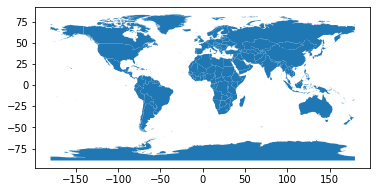

In [28]:
world_countries.plot()

In [29]:
c1_world_import_nw = pd.merge(
    world_countries, c1_i_netweight, left_on="COUNTRY", right_on="Reporter"
)

In [30]:
c1_world_import_nw.head(1)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry,Reporter,Netweight (kg)
0,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.25809 -17.85278, -149.27571 -17.84632, -149.28894 -17.83305, -149.29796 -17.82084, -149.36947 -17.73889, -149.37860 -17.74361, -149.42086 -17.75611, -149.47168 -17.76639, -149.48764 -17.76597, -149.59057 -17.71139, -149.63892 -17.62597, -149.64169 -17.61195, -149.64142 -17.59278, -149.63559 -17.56167, -149.63251 -17.55000, -149.62388 -17.54070, -149.58739 -17.51618, -149.49211 -17.49376, -149.44998 -17.49945, -149.41474 -17.50917, -149.37363 -17.52695, -149.35916 -17.53446, -149.34862 -17.54209, -149.33276 -17.57028, -149.32666 -17.59223, -149.32334 -17.65250, -149.32309 -17.67111, -149.32404 -17.68778, -149.32014 -17.70215, -149.30751 -17.71264, -149.29306 -17.71750, -149.23056 -17.73028, -149.20779 -17.73417, -149.18474 -17.73139, -149.17471 -17.73612, -149.16223 -17.75139, -149.15473 -17.76445, -149.14837 -17.78196, -149.14668 -17.80570, -149.15222 -17.83362, -149.15781 -17.84973, -149.16559 -17.86361, -149.17416 -17.86916, -149.17920 -17.87084)), ((-139.05474 -9.86000, -139.10892 -9.84695, -139.11914 -9.84361, -139.12891 -9.83889, -139.14111 -9.83084, -139.15143 -9.82056, -139.16879 -9.79376, -139.17226 -9.77292, -139.16726 -9.76000, -139.04444 -9.69542, -139.00473 -9.69695, -138.97568 -9.70861, -138.96876 -9.72236, -138.95707 -9.74139, -138.89032 -9.75723, -138.85058 -9.75611, -138.83612 -9.74986, -138.82532 -9.74027, -138.81252 -9.73792, -138.80976 -9.74806, -138.81558 -9.75945, -138.83197 -9.77084, -138.84916 -9.78112, -138.89585 -9.80625, -138.91086 -9.80834, -138.97943 -9.81500, -139.00000 -9.81500, -139.01320 -9.81139, -139.02974 -9.80723, -139.04863 -9.80820, -139.06134 -9.81889, -139.05474 -9.86000)), ((-140.17783 -8.95639, -140.18946 -8.95416, -140.20584 -8.94473, -140.22584 -8.93042, -140.23056 -8.92139, -140.25614 -8.82736, -140.25339 -8.81305, -140.24975 -8.80278, -140.24503 -8.79389, -140.23666 -8.78389, -140.22514 -8.77819, -140.06891 -8.81167, -140.04282 -8.83028, -140.01599 -8.85285, -140.01196 -8.87097, -140.01516 -8.88847, -140.02266 -8.89805, -140.07782 -8.91806, -140.09084 -8.92208, -140.10487 -8.91875, -140.11972 -8.91889, -140.16696 -8.93305, -140.17684 -8.94014, -140.17783 -8.95639)), ((-151.44449 -16.90445, -151.46544 -16.90292, -151.47513 -16.89750, -151.49170 -16.84917, -151.49777 -16.78403, -151.49136 -16.76000, -151.48752 -16.74945, -151.47252 -16.73972, -151.43098 -16.74556, -151.35112 -16.84584, -151.35098 -16.86035, -151.40033 -16.88834, -151.44449 -16.90445)), ((-149.85443 -17.57445, -149.86834 -17.56834, -149.87806 -17.56362, -149.92504 -17.52528, -149.93808 -17.50973, -149.94168 -17.49722, -149.93726 -17.48416, -149.92279 -17.47778, -149.91114 -17.47611, -149.79463 -17.46680, -149.78529 -17.47125, -149.78322 -17.48778, -149.79849 -17.52778, -149.84596 -17.57250, -149.85443 -17.57445)))",French Polynesia,106407.0


<AxesSubplot:>

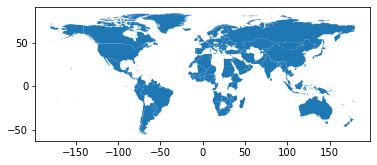

In [31]:
c1_world_import_nw.plot()

In [32]:
c1_world_import_nw.to_file(
    "../data/processed/2012_2016_netweight_imports.geojson", driver="GeoJSON"
)

In [33]:
c1_world_export_nw = pd.merge(
    world_countries, c1_e_netweight, left_on="COUNTRY", right_on="Reporter"
)

In [34]:
c1_world_export_nw.head(1)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry,Reporter,Netweight (kg)
0,7,Samoa,WS,Samoa,WS,3.019662,0.245519,"MULTIPOLYGON (((-172.59650 -13.50911, -172.55194 -13.49722, -172.47528 -13.47972, -172.39112 -13.46417, -172.36084 -13.46056, -172.34836 -13.46139, -172.30342 -13.47215, -172.28780 -13.48416, -172.22250 -13.56305, -172.20306 -13.59195, -172.19336 -13.61334, -172.16835 -13.68097, -172.16782 -13.69139, -172.21236 -13.80653, -172.22504 -13.80889, -172.25850 -13.80431, -172.39334 -13.79167, -172.48599 -13.80681, -172.50891 -13.80666, -172.52793 -13.80271, -172.57444 -13.76584, -172.59003 -13.73972, -172.69110 -13.62611, -172.75169 -13.57403, -172.77283 -13.55000, -172.78003 -13.53257, -172.77254 -13.51750, -172.75558 -13.51028, -172.73891 -13.50847, -172.72864 -13.51334, -172.65527 -13.51917, -172.59650 -13.50911)), ((-171.44198 -14.05750, -171.46527 -14.05278, -171.47998 -14.05056, -171.52056 -14.04778, -171.54611 -14.05028, -171.58893 -14.05250, -171.64837 -14.05028, -171.76810 -14.03584, -171.91114 -14.01250, -172.05060 -13.91250, -172.05850 -13.90319, -172.06476 -13.87819, -172.05976 -13.86695, -172.02933 -13.84027, -171.90671 -13.80666, -171.88391 -13.80556, -171.82226 -13.80750, -171.74808 -13.83167, -171.61914 -13.87861, -171.44418 -13.98445, -171.43071 -14.00236, -171.42920 -14.01625, -171.44198 -14.05750)))",Samoa,9898.0


<AxesSubplot:>

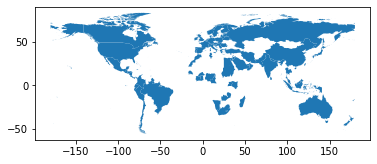

In [35]:
c1_world_export_nw.plot()

In [36]:
c1_world_export_nw.to_file(
    "../data/processed/2012_2016_netweight_exports.geojson", driver="GeoJSON"
)

In [37]:
c1_world_USD = pd.merge(
    world_countries, USD_bamboo, left_on="COUNTRY", right_on="Reporter"
)

In [38]:
c1_world_USD.head(1)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry,Reporter,Trade Value (US$)
0,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.25809 -17.85278, -149.27571 -17.84632, -149.28894 -17.83305, -149.29796 -17.82084, -149.36947 -17.73889, -149.37860 -17.74361, -149.42086 -17.75611, -149.47168 -17.76639, -149.48764 -17.76597, -149.59057 -17.71139, -149.63892 -17.62597, -149.64169 -17.61195, -149.64142 -17.59278, -149.63559 -17.56167, -149.63251 -17.55000, -149.62388 -17.54070, -149.58739 -17.51618, -149.49211 -17.49376, -149.44998 -17.49945, -149.41474 -17.50917, -149.37363 -17.52695, -149.35916 -17.53446, -149.34862 -17.54209, -149.33276 -17.57028, -149.32666 -17.59223, -149.32334 -17.65250, -149.32309 -17.67111, -149.32404 -17.68778, -149.32014 -17.70215, -149.30751 -17.71264, -149.29306 -17.71750, -149.23056 -17.73028, -149.20779 -17.73417, -149.18474 -17.73139, -149.17471 -17.73612, -149.16223 -17.75139, -149.15473 -17.76445, -149.14837 -17.78196, -149.14668 -17.80570, -149.15222 -17.83362, -149.15781 -17.84973, -149.16559 -17.86361, -149.17416 -17.86916, -149.17920 -17.87084)), ((-139.05474 -9.86000, -139.10892 -9.84695, -139.11914 -9.84361, -139.12891 -9.83889, -139.14111 -9.83084, -139.15143 -9.82056, -139.16879 -9.79376, -139.17226 -9.77292, -139.16726 -9.76000, -139.04444 -9.69542, -139.00473 -9.69695, -138.97568 -9.70861, -138.96876 -9.72236, -138.95707 -9.74139, -138.89032 -9.75723, -138.85058 -9.75611, -138.83612 -9.74986, -138.82532 -9.74027, -138.81252 -9.73792, -138.80976 -9.74806, -138.81558 -9.75945, -138.83197 -9.77084, -138.84916 -9.78112, -138.89585 -9.80625, -138.91086 -9.80834, -138.97943 -9.81500, -139.00000 -9.81500, -139.01320 -9.81139, -139.02974 -9.80723, -139.04863 -9.80820, -139.06134 -9.81889, -139.05474 -9.86000)), ((-140.17783 -8.95639, -140.18946 -8.95416, -140.20584 -8.94473, -140.22584 -8.93042, -140.23056 -8.92139, -140.25614 -8.82736, -140.25339 -8.81305, -140.24975 -8.80278, -140.24503 -8.79389, -140.23666 -8.78389, -140.22514 -8.77819, -140.06891 -8.81167, -140.04282 -8.83028, -140.01599 -8.85285, -140.01196 -8.87097, -140.01516 -8.88847, -140.02266 -8.89805, -140.07782 -8.91806, -140.09084 -8.92208, -140.10487 -8.91875, -140.11972 -8.91889, -140.16696 -8.93305, -140.17684 -8.94014, -140.17783 -8.95639)), ((-151.44449 -16.90445, -151.46544 -16.90292, -151.47513 -16.89750, -151.49170 -16.84917, -151.49777 -16.78403, -151.49136 -16.76000, -151.48752 -16.74945, -151.47252 -16.73972, -151.43098 -16.74556, -151.35112 -16.84584, -151.35098 -16.86035, -151.40033 -16.88834, -151.44449 -16.90445)), ((-149.85443 -17.57445, -149.86834 -17.56834, -149.87806 -17.56362, -149.92504 -17.52528, -149.93808 -17.50973, -149.94168 -17.49722, -149.93726 -17.48416, -149.92279 -17.47778, -149.91114 -17.47611, -149.79463 -17.46680, -149.78529 -17.47125, -149.78322 -17.48778, -149.79849 -17.52778, -149.84596 -17.57250, -149.85443 -17.57445)))",French Polynesia,186605


<AxesSubplot:>

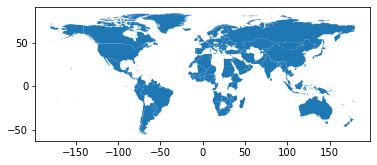

In [39]:
c1_world_USD.plot()

In [40]:
c1_world_USD.to_file("../data/processed/2012_2016_trade_USD.geojson", driver="GeoJSON")

In [41]:
c2_world_USD = pd.merge(
    world_countries, dollar_bamboo, left_on="COUNTRY", right_on="Reporter"
)

In [42]:
c2_world_USD.head(1)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry,Reporter,Trade Value (US$)
0,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.25809 -17.85278, -149.27571 -17.84632, -149.28894 -17.83305, -149.29796 -17.82084, -149.36947 -17.73889, -149.37860 -17.74361, -149.42086 -17.75611, -149.47168 -17.76639, -149.48764 -17.76597, -149.59057 -17.71139, -149.63892 -17.62597, -149.64169 -17.61195, -149.64142 -17.59278, -149.63559 -17.56167, -149.63251 -17.55000, -149.62388 -17.54070, -149.58739 -17.51618, -149.49211 -17.49376, -149.44998 -17.49945, -149.41474 -17.50917, -149.37363 -17.52695, -149.35916 -17.53446, -149.34862 -17.54209, -149.33276 -17.57028, -149.32666 -17.59223, -149.32334 -17.65250, -149.32309 -17.67111, -149.32404 -17.68778, -149.32014 -17.70215, -149.30751 -17.71264, -149.29306 -17.71750, -149.23056 -17.73028, -149.20779 -17.73417, -149.18474 -17.73139, -149.17471 -17.73612, -149.16223 -17.75139, -149.15473 -17.76445, -149.14837 -17.78196, -149.14668 -17.80570, -149.15222 -17.83362, -149.15781 -17.84973, -149.16559 -17.86361, -149.17416 -17.86916, -149.17920 -17.87084)), ((-139.05474 -9.86000, -139.10892 -9.84695, -139.11914 -9.84361, -139.12891 -9.83889, -139.14111 -9.83084, -139.15143 -9.82056, -139.16879 -9.79376, -139.17226 -9.77292, -139.16726 -9.76000, -139.04444 -9.69542, -139.00473 -9.69695, -138.97568 -9.70861, -138.96876 -9.72236, -138.95707 -9.74139, -138.89032 -9.75723, -138.85058 -9.75611, -138.83612 -9.74986, -138.82532 -9.74027, -138.81252 -9.73792, -138.80976 -9.74806, -138.81558 -9.75945, -138.83197 -9.77084, -138.84916 -9.78112, -138.89585 -9.80625, -138.91086 -9.80834, -138.97943 -9.81500, -139.00000 -9.81500, -139.01320 -9.81139, -139.02974 -9.80723, -139.04863 -9.80820, -139.06134 -9.81889, -139.05474 -9.86000)), ((-140.17783 -8.95639, -140.18946 -8.95416, -140.20584 -8.94473, -140.22584 -8.93042, -140.23056 -8.92139, -140.25614 -8.82736, -140.25339 -8.81305, -140.24975 -8.80278, -140.24503 -8.79389, -140.23666 -8.78389, -140.22514 -8.77819, -140.06891 -8.81167, -140.04282 -8.83028, -140.01599 -8.85285, -140.01196 -8.87097, -140.01516 -8.88847, -140.02266 -8.89805, -140.07782 -8.91806, -140.09084 -8.92208, -140.10487 -8.91875, -140.11972 -8.91889, -140.16696 -8.93305, -140.17684 -8.94014, -140.17783 -8.95639)), ((-151.44449 -16.90445, -151.46544 -16.90292, -151.47513 -16.89750, -151.49170 -16.84917, -151.49777 -16.78403, -151.49136 -16.76000, -151.48752 -16.74945, -151.47252 -16.73972, -151.43098 -16.74556, -151.35112 -16.84584, -151.35098 -16.86035, -151.40033 -16.88834, -151.44449 -16.90445)), ((-149.85443 -17.57445, -149.86834 -17.56834, -149.87806 -17.56362, -149.92504 -17.52528, -149.93808 -17.50973, -149.94168 -17.49722, -149.93726 -17.48416, -149.92279 -17.47778, -149.91114 -17.47611, -149.79463 -17.46680, -149.78529 -17.47125, -149.78322 -17.48778, -149.79849 -17.52778, -149.84596 -17.57250, -149.85443 -17.57445)))",French Polynesia,29235


<AxesSubplot:>

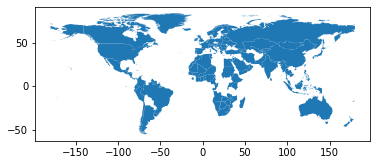

In [43]:
c2_world_USD.plot()

In [44]:
c2_world_USD.to_file("../data/processed/2017_2021_trade_USD.geojson", driver="GeoJSON")

In [45]:
c2_world_import_nw = pd.merge(
    world_countries, c2_i_netweight, left_on="COUNTRY", right_on="Reporter"
)

In [46]:
c2_world_import_nw.head(1)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry,Reporter,Netweight (kg)
0,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.25809 -17.85278, -149.27571 -17.84632, -149.28894 -17.83305, -149.29796 -17.82084, -149.36947 -17.73889, -149.37860 -17.74361, -149.42086 -17.75611, -149.47168 -17.76639, -149.48764 -17.76597, -149.59057 -17.71139, -149.63892 -17.62597, -149.64169 -17.61195, -149.64142 -17.59278, -149.63559 -17.56167, -149.63251 -17.55000, -149.62388 -17.54070, -149.58739 -17.51618, -149.49211 -17.49376, -149.44998 -17.49945, -149.41474 -17.50917, -149.37363 -17.52695, -149.35916 -17.53446, -149.34862 -17.54209, -149.33276 -17.57028, -149.32666 -17.59223, -149.32334 -17.65250, -149.32309 -17.67111, -149.32404 -17.68778, -149.32014 -17.70215, -149.30751 -17.71264, -149.29306 -17.71750, -149.23056 -17.73028, -149.20779 -17.73417, -149.18474 -17.73139, -149.17471 -17.73612, -149.16223 -17.75139, -149.15473 -17.76445, -149.14837 -17.78196, -149.14668 -17.80570, -149.15222 -17.83362, -149.15781 -17.84973, -149.16559 -17.86361, -149.17416 -17.86916, -149.17920 -17.87084)), ((-139.05474 -9.86000, -139.10892 -9.84695, -139.11914 -9.84361, -139.12891 -9.83889, -139.14111 -9.83084, -139.15143 -9.82056, -139.16879 -9.79376, -139.17226 -9.77292, -139.16726 -9.76000, -139.04444 -9.69542, -139.00473 -9.69695, -138.97568 -9.70861, -138.96876 -9.72236, -138.95707 -9.74139, -138.89032 -9.75723, -138.85058 -9.75611, -138.83612 -9.74986, -138.82532 -9.74027, -138.81252 -9.73792, -138.80976 -9.74806, -138.81558 -9.75945, -138.83197 -9.77084, -138.84916 -9.78112, -138.89585 -9.80625, -138.91086 -9.80834, -138.97943 -9.81500, -139.00000 -9.81500, -139.01320 -9.81139, -139.02974 -9.80723, -139.04863 -9.80820, -139.06134 -9.81889, -139.05474 -9.86000)), ((-140.17783 -8.95639, -140.18946 -8.95416, -140.20584 -8.94473, -140.22584 -8.93042, -140.23056 -8.92139, -140.25614 -8.82736, -140.25339 -8.81305, -140.24975 -8.80278, -140.24503 -8.79389, -140.23666 -8.78389, -140.22514 -8.77819, -140.06891 -8.81167, -140.04282 -8.83028, -140.01599 -8.85285, -140.01196 -8.87097, -140.01516 -8.88847, -140.02266 -8.89805, -140.07782 -8.91806, -140.09084 -8.92208, -140.10487 -8.91875, -140.11972 -8.91889, -140.16696 -8.93305, -140.17684 -8.94014, -140.17783 -8.95639)), ((-151.44449 -16.90445, -151.46544 -16.90292, -151.47513 -16.89750, -151.49170 -16.84917, -151.49777 -16.78403, -151.49136 -16.76000, -151.48752 -16.74945, -151.47252 -16.73972, -151.43098 -16.74556, -151.35112 -16.84584, -151.35098 -16.86035, -151.40033 -16.88834, -151.44449 -16.90445)), ((-149.85443 -17.57445, -149.86834 -17.56834, -149.87806 -17.56362, -149.92504 -17.52528, -149.93808 -17.50973, -149.94168 -17.49722, -149.93726 -17.48416, -149.92279 -17.47778, -149.91114 -17.47611, -149.79463 -17.46680, -149.78529 -17.47125, -149.78322 -17.48778, -149.79849 -17.52778, -149.84596 -17.57250, -149.85443 -17.57445)))",French Polynesia,8756.0


<AxesSubplot:>

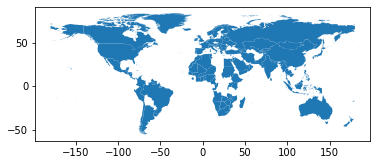

In [47]:
c2_world_import_nw.plot()

In [48]:
c2_world_import_nw.to_file(
    "../data/processed/2017_2021_imports_netweight.geojson", driver="GeoJSON"
)

In [49]:
c2_world_export_nw = pd.merge(
    world_countries, c2_e_netweight, left_on="COUNTRY", right_on="Reporter"
)

In [50]:
c2_world_export_nw.head(1)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry,Reporter,Netweight (kg)
0,11,El Salvador,SV,El Salvador,SV,7.253572,1.719035,"MULTIPOLYGON (((-87.69467 13.81901, -87.72501 13.73333, -87.77695 13.57243, -87.78339 13.52416, -87.75486 13.51464, -87.71532 13.50475, -87.71109 13.48165, -87.71335 13.47111, -87.75029 13.44305, -87.81558 13.40538, -87.83696 13.43632, -87.87015 13.38271, -87.86557 13.36028, -87.84612 13.34111, -87.82390 13.33208, -87.78576 13.29493, -87.79799 13.26208, -87.83139 13.23611, -87.93779 13.15639, -87.98500 13.16333, -88.04140 13.16555, -88.09187 13.16673, -88.10876 13.16680, -88.12611 13.16389, -88.19640 13.15944, -88.22000 13.15805, -88.41109 13.18761, -88.47534 13.23853, -88.55043 13.27395, -88.61209 13.28403, -88.70816 13.26094, -88.64188 13.24937, -88.62167 13.25972, -88.58528 13.26334, -88.50587 13.19568, -88.53506 13.19911, -88.61528 13.21111, -88.66555 13.22111, -88.70668 13.22861, -88.75890 13.23555, -88.81380 13.25155, -88.83226 13.25836, -88.86168 13.28250, -88.88167 13.29389, -88.98390 13.34139, -89.11418 13.40111, -89.13722 13.41006, -89.15224 13.41889, -89.18529 13.43777, -89.22000 13.45527, -89.29715 13.48271, -89.38085 13.49250, -89.46667 13.49972, -89.60867 13.51506, -89.65085 13.52805, -89.68431 13.53097, -89.75890 13.53084, -89.81855 13.53580, -89.82890 13.57611, -89.84633 13.60583, -89.87556 13.62819, -89.91667 13.65055, -89.95445 13.66398, -90.00000 13.69798, -90.09639 13.74584, -90.10806 13.78903, -90.10390 13.82333, -90.08654 13.86847, -90.02056 13.93861, -89.88903 14.04416, -89.85445 14.05944, -89.81820 14.06645, -89.73973 14.04139, -89.74667 14.06958, -89.72682 14.11792, -89.71015 14.14500, -89.68640 14.17000, -89.65209 14.19555, -89.62696 14.20931, -89.60515 14.20819, -89.57945 14.20750, -89.51816 14.23385, -89.54334 14.30416, -89.56549 14.31645, -89.58917 14.32124, -89.58335 14.38583, -89.57097 14.41472, -89.54848 14.42084, -89.49501 14.42139, -89.43556 14.41486, -89.34831 14.43198, -89.33216 14.41048, -89.31556 14.40409, -89.29779 14.40111, -89.21335 14.37583, -89.17445 14.35472, -89.11973 14.32437, -89.03723 14.33472, -89.02474 14.32764, -88.97778 14.25389, -88.96056 14.22195, -88.95947 14.21698, -88.95605 14.19389, -88.92021 14.20597, -88.89778 14.20361, -88.87515 14.18764, -88.86029 14.17111, -88.83945 14.13847, -88.83112 14.11416, -88.82757 14.10014, -88.80633 14.09618, -88.77244 14.13347, -88.75224 14.13445, -88.73417 14.11555, -88.71931 14.09236, -88.70570 14.04416, -88.66148 14.01408, -88.62998 14.01483, -88.50667 13.98236, -88.49501 13.97027, -88.49945 13.91584, -88.48889 13.86584, -88.46793 13.85472, -88.43167 13.87014, -88.40335 13.88403, -88.37597 13.88250, -88.35224 13.86777, -88.34523 13.87486, -88.31931 13.88874, -88.25961 13.90528, -88.23500 13.94027, -88.19688 13.98762, -88.16166 13.97695, -88.12195 13.99055, -88.06001 13.96389, -88.04044 13.93117, -88.00586 13.87504, -87.95334 13.89611, -87.94056 13.89500, -87.90834 13.89583, -87.89751 13.89909, -87.80085 13.89695, -87.75029 13.86416, -87.72571 13.83458, -87.70765 13.82250, -87.69467 13.81901)))",El Salvador,2393.0


<AxesSubplot:>

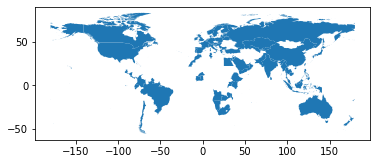

In [51]:
c2_world_export_nw.plot()

In [52]:
c2_world_export_nw.to_file(
    "../data/processed/2017_2021_exports_netweight.geojson", driver="GeoJSON"
)

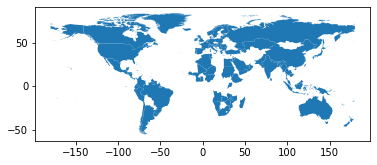

In [104]:
df_2012 = comtrade_1[comtrade_1["Year"] == 2012]
import_2012 = df_2012[df_2012["Trade Flow"].str.contains("Import")]
i_nw_2012 = (
    import_2012.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2012.head()

nw_2012_import = pd.merge(
    world_countries, i_nw_2012, left_on="COUNTRY", right_on="Reporter"
)
nw_2012_import.plot()

nw_2012_import.to_file("../data/processed/2012_imports.geojson", driver="GeoJSON")

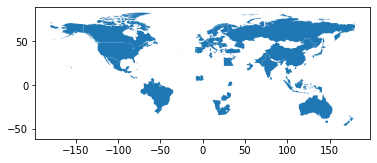

In [105]:
export_2012 = df_2012[df_2012["Trade Flow"].str.contains("Export")]
e_nw_2012 = (
    export_2012.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2012.head()

nw_2012_export = pd.merge(
    world_countries, e_nw_2012, left_on="COUNTRY", right_on="Reporter"
)
nw_2012_export.plot()

nw_2012_export.to_file("../data/processed/2012_exports.geojson", driver="GeoJSON")

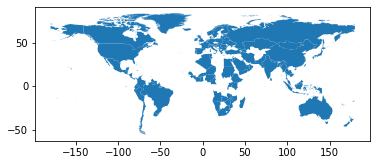

In [106]:
df_2013 = comtrade_1[comtrade_1["Year"] == 2013]
import_2013 = df_2013[df_2013["Trade Flow"].str.contains("Import")]
i_nw_2013 = (
    import_2013.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2013.head()

nw_2013_import = pd.merge(
    world_countries, i_nw_2013, left_on="COUNTRY", right_on="Reporter"
)
nw_2013_import.plot()

nw_2013_import.to_file("../data/processed/2013_imports.geojson", driver="GeoJSON")

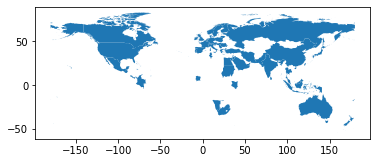

In [107]:
export_2013 = df_2013[df_2013["Trade Flow"].str.contains("Export")]
e_nw_2013 = (
    export_2013.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2013.head()

nw_2013_export = pd.merge(
    world_countries, e_nw_2013, left_on="COUNTRY", right_on="Reporter"
)
nw_2013_export.plot()

nw_2013_export.to_file("../data/processed/2013_exports.geojson", driver="GeoJSON")

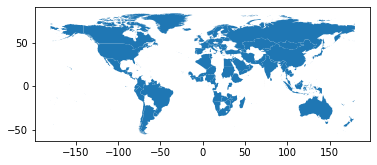

In [108]:
df_2014 = comtrade_1[comtrade_1["Year"] == 2014]
import_2014 = df_2014[df_2014["Trade Flow"].str.contains("Import")]
i_nw_2014 = (
    import_2014.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2014.head()

nw_2014_import = pd.merge(
    world_countries, i_nw_2014, left_on="COUNTRY", right_on="Reporter"
)
nw_2014_import.plot()

nw_2014_import.to_file("../data/processed/2014_imports.geojson", driver="GeoJSON")

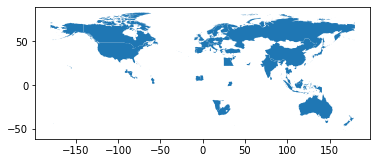

In [109]:
export_2014 = df_2014[df_2014["Trade Flow"].str.contains("Export")]
e_nw_2014 = (
    export_2014.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2014.head()

nw_2014_export = pd.merge(
    world_countries, e_nw_2014, left_on="COUNTRY", right_on="Reporter"
)
nw_2014_export.plot()

nw_2014_export.to_file("../data/processed/2014_exports.geojson", driver="GeoJSON")

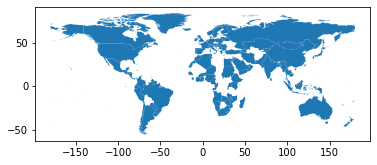

In [110]:
df_2015 = comtrade_1[comtrade_1["Year"] == 2015]
import_2015 = df_2015[df_2015["Trade Flow"].str.contains("Import")]
i_nw_2015 = (
    import_2015.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2015.head()

nw_2015_import = pd.merge(
    world_countries, i_nw_2015, left_on="COUNTRY", right_on="Reporter"
)
nw_2015_import.plot()

nw_2015_import.to_file("../data/processed/2015_imports.geojson", driver="GeoJSON")

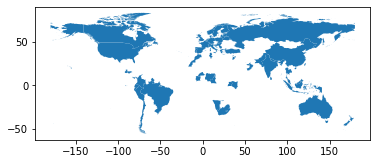

In [111]:
export_2015 = df_2015[df_2015["Trade Flow"].str.contains("Export")]
e_nw_2015 = (
    export_2015.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2015.head()

nw_2015_export = pd.merge(
    world_countries, e_nw_2015, left_on="COUNTRY", right_on="Reporter"
)
nw_2015_export.plot()

nw_2015_export.to_file("../data/processed/2015_exports.geojson", driver="GeoJSON")

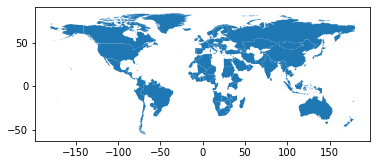

In [112]:
df_2016 = comtrade_1[comtrade_1["Year"] == 2016]
import_2016 = df_2016[df_2016["Trade Flow"].str.contains("Import")]
i_nw_2016 = (
    import_2016.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2016.head()

nw_2016_import = pd.merge(
    world_countries, i_nw_2016, left_on="COUNTRY", right_on="Reporter"
)
nw_2016_import.plot()

nw_2016_import.to_file("../data/processed/2016_imports.geojson", driver="GeoJSON")

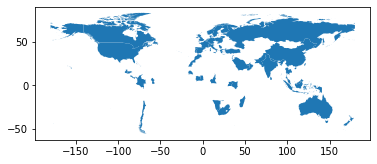

In [113]:
export_2016 = df_2016[df_2016["Trade Flow"].str.contains("Export")]
e_nw_2016 = (
    export_2016.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2016.head()

nw_2016_export = pd.merge(
    world_countries, e_nw_2016, left_on="COUNTRY", right_on="Reporter"
)
nw_2016_export.plot()

nw_2016_export.to_file("../data/processed/2016_exports.geojson", driver="GeoJSON")

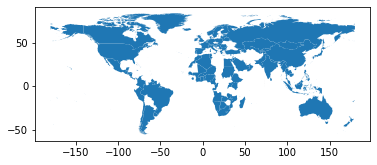

In [114]:
df_2017 = comtrade_2[comtrade_2["Year"] == 2017]
import_2017 = df_2017[df_2017["Trade Flow"].str.contains("Import")]
i_nw_2017 = (
    import_2017.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2017.head()

nw_2017_import = pd.merge(
    world_countries, i_nw_2017, left_on="COUNTRY", right_on="Reporter"
)
nw_2017_import.plot()

nw_2017_import.to_file("../data/processed/2017_imports.geojson", driver="GeoJSON")

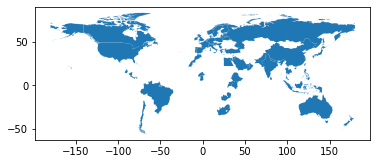

In [115]:
export_2017 = df_2017[df_2017["Trade Flow"].str.contains("Export")]
e_nw_2017 = (
    export_2017.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2017.head()

nw_2017_export = pd.merge(
    world_countries, e_nw_2017, left_on="COUNTRY", right_on="Reporter"
)
nw_2017_export.plot()

nw_2017_export.to_file("../data/processed/2017_exports.geojson", driver="GeoJSON")

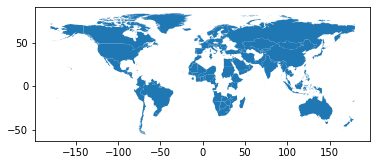

In [116]:
df_2018 = comtrade_2[comtrade_2["Year"] == 2018]
import_2018 = df_2018[df_2018["Trade Flow"].str.contains("Import")]
i_nw_2018 = (
    import_2018.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2018.head()

nw_2018_import = pd.merge(
    world_countries, i_nw_2018, left_on="COUNTRY", right_on="Reporter"
)
nw_2018_import.plot()

nw_2018_import.to_file("../data/processed/2018_imports.geojson", driver="GeoJSON")

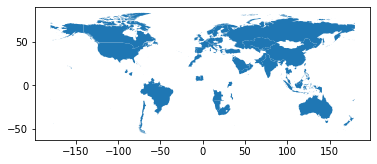

In [117]:
export_2018 = df_2018[df_2018["Trade Flow"].str.contains("Export")]
e_nw_2018 = (
    export_2018.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2018.head()

nw_2018_export = pd.merge(
    world_countries, e_nw_2018, left_on="COUNTRY", right_on="Reporter"
)
nw_2018_export.plot()

nw_2018_export.to_file("../data/processed/2018_exports.geojson", driver="GeoJSON")

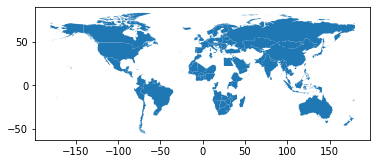

In [118]:
df_2019 = comtrade_2[comtrade_2["Year"] == 2019]
import_2019 = df_2019[df_2019["Trade Flow"].str.contains("Import")]
i_nw_2019 = (
    import_2019.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2019.head()

nw_2019_import = pd.merge(
    world_countries, i_nw_2019, left_on="COUNTRY", right_on="Reporter"
)
nw_2019_import.plot()

nw_2019_import.to_file("../data/processed/2019_imports.geojson", driver="GeoJSON")

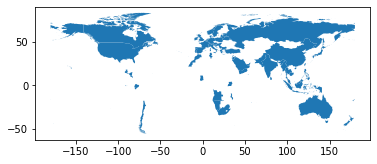

In [119]:
export_2019 = df_2019[df_2019["Trade Flow"].str.contains("Export")]
e_nw_2019 = (
    export_2019.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2019.head()

nw_2019_export = pd.merge(
    world_countries, e_nw_2019, left_on="COUNTRY", right_on="Reporter"
)
nw_2019_export.plot()

nw_2019_export.to_file("../data/processed/2019_exports.geojson", driver="GeoJSON")

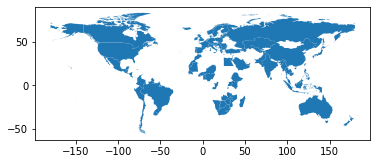

In [120]:
df_2020 = comtrade_2[comtrade_2["Year"] == 2020]
import_2020 = df_2020[df_2020["Trade Flow"].str.contains("Import")]
i_nw_2020 = (
    import_2020.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2020.head()

nw_2020_import = pd.merge(
    world_countries, i_nw_2020, left_on="COUNTRY", right_on="Reporter"
)
nw_2020_import.plot()

nw_2020_import.to_file("../data/processed/2020_imports.geojson", driver="GeoJSON")

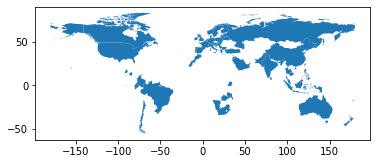

In [121]:
export_2020 = df_2020[df_2020["Trade Flow"].str.contains("Export")]
e_nw_2020 = (
    export_2020.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2020.head()

nw_2020_export = pd.merge(
    world_countries, e_nw_2020, left_on="COUNTRY", right_on="Reporter"
)
nw_2020_export.plot()

nw_2020_export.to_file("../data/processed/2020_exports.geojson", driver="GeoJSON")

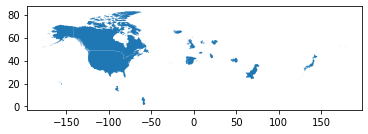

In [122]:
df_2021 = comtrade_2[comtrade_2["Year"] == 2021]
import_2021 = df_2021[df_2021["Trade Flow"].str.contains("Import")]
i_nw_2021 = (
    import_2021.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
i_nw_2021.head()

nw_2021_import = pd.merge(
    world_countries, i_nw_2021, left_on="COUNTRY", right_on="Reporter"
)
nw_2021_import.plot()

nw_2021_import.to_file("../data/processed/2021_imports.geojson", driver="GeoJSON")

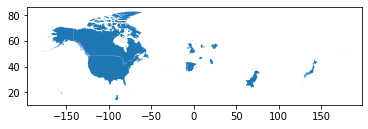

In [123]:
export_2021 = df_2021[df_2021["Trade Flow"].str.contains("Export")]
e_nw_2021 = (
    export_2021.groupby(["Reporter"])["Netweight (kg)"]
    .agg("sum")
    .sort_values(ascending=False)
    .reset_index()
)
e_nw_2021.head()

nw_2021_export = pd.merge(
    world_countries, e_nw_2021, left_on="COUNTRY", right_on="Reporter"
)
nw_2021_export.plot()

nw_2021_export.to_file("../data/processed/2021_exports.geojson", driver="GeoJSON")

In [127]:
i_nw_2019

,Reporter,Netweight (kg)
0,Yemen,74143409.0
1,USA,31724287.0
2,Netherlands,13646075.0
3,Singapore,11284340.0
4,United Arab Emirates,5003532.0
5,Cambodia,4007075.0
6,Lebanon,3658035.0
7,Japan,2769959.0
8,Canada,1968788.0
9,Lithuania,1790089.0


In [128]:
e_nw_2019

,Reporter,Netweight (kg)
0,China,64918677.0
1,Hungary,15717040.0
2,USA,10310940.0
3,Spain,1746403.0
4,Uganda,1602575.0
5,Portugal,1369021.0
6,Netherlands,1064137.0
7,United Kingdom,986515.0
8,United Rep. of Tanzania,801060.0
9,Sweden,498321.0
